In [40]:
#settingup the local path
your_local_path="/Users/megha.shetty/desktop/facebookproject/"

In [2]:
pwd

'/Users/sudhirshetty.shetty'

In [ ]:
#importing numpy and pandas
import numpy as np
import pandas as pd



In [42]:
cd /Users/sudhirshetty.shetty/desktop/facebookproject/

/Users/sudhirshetty.shetty/Desktop/facebookproject


In [43]:
#loding the facebook data 
fb=pd.read_csv("/Users/megha.shetty/desktop/facebookproject/pseudo_facebook.tsv",sep='\t', encoding='UTF-8')

# fb.head() gives first 5 rows 
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [44]:
#check the structure of data
fb.shape

(99003, 15)

In [45]:
#discribe spread of facebook data
fb.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


As per the data describe we got few details ,
1. Mean age of facebook user is 37. We need to concentrate on young people more.
2. Min Mean age of facebook user is 13. Which tells us that teenager are using fb not kids below 13.
3. Mean tenure is 537 which is near to 1.5 year. 
4. Friendship initiated is half of friend count.

In [ ]:
#by using fb.info data type of the object in each column
fb.info()

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

Few Business questions which we can think of are explained below 

1. Which age group use Facebook more ?

Text(0.5, 0, 'Age')

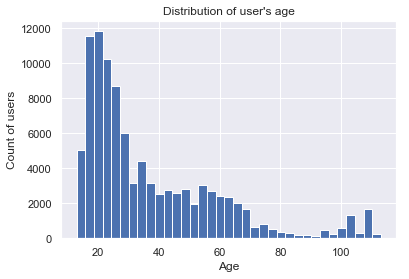

In [47]:
#lets plot the user age and count
fb.age.plot.hist(bins=35)
plt.title("Distribution of user's age")
plt.ylabel("Count of users")
plt.xlabel("Age")


In [ ]:
#From above graph we can makeout that age group between 20 to 30 uses Fb more 

2. Which gender use Facebook more ?

In [28]:
#To find the geneder we will use value_counts() which return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
#We will pass dropna=False to count missing values
fb.gender.value_counts(dropna=False)


male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [10]:
#get distinct values of gender from the data set
fb.gender.unique()

array(['male', 'female', nan], dtype=object)

In [49]:
#Now we have to check any missing values present in each column
#now we have use a new function to find missing value using apply() function
#Apply() allow the users to pass a function and apply it on every single value of the column
def missing_value(x):
    return sum(x.isnull())

#apply to each column to find missing value
print("missing values in each column")
print(fb.apply(missing_value,axis=0))

missing values in each column
userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64


In [50]:
#In gender we got more missing value 
#Now we have to fill the missing values 
fb['gender'].fillna(fb['gender'].mode()[0], inplace=True)

#now check the missing value
#print("missing values in each column")
print(fb.apply(missing_value,axis=0))

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64


In [51]:
#In tenture we have 2 missing values .Since it is less than 5 we can drop them
fb.dropna()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


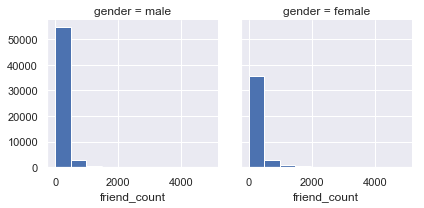

In [25]:
#Now we have to create a visualization to know which gender use facebook more
df=fb[fb.gender.notnull()]
g=sns.FacetGrid(df,col='gender')
g=g.map(plt.hist,"friend_count",color='b')


In [52]:
#Male use facebook compared to female
#lets find the statistics of male data
fb.groupby("gender").friend_count.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,241.969941,476.039706,0.0,37.0,96.0,244.0,4923.0
male,58749.0,165.093176,308.403825,0.0,27.0,74.0,182.0,4917.0


In [ ]:
#male's friendcout is more compared to female


3. What is the tenure(usage) of facebook user?

Text(0, 0.5, 'number of user in sample')

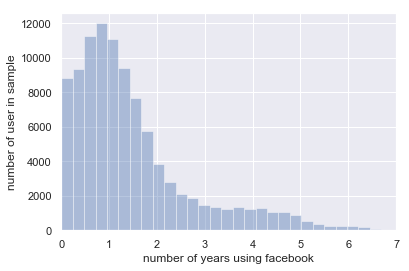

In [9]:
df=fb[fb.tenure.notnull()]
ax=sns.distplot(df["tenure"]/365,kde=False,bins=36)
plt.xlim(0,7)
plt.xlabel("number of years using facebook")
plt.ylabel("number of user in sample")

In [ ]:
#tenure is 1 year from the graph 

4. What is the distribution Male vs Female friend count ??

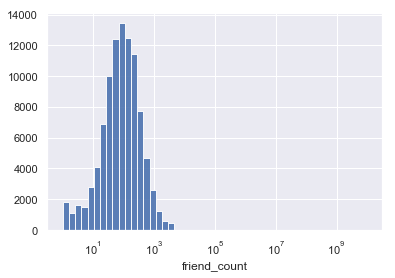

In [16]:
#compare the distribution of male vs female friend count
ax=sns.distplot(fb["friend_count"],kde=False,hist_kws={"alpha":0.9},bins=np.logspace(0,10))
plt.xscale('log')


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


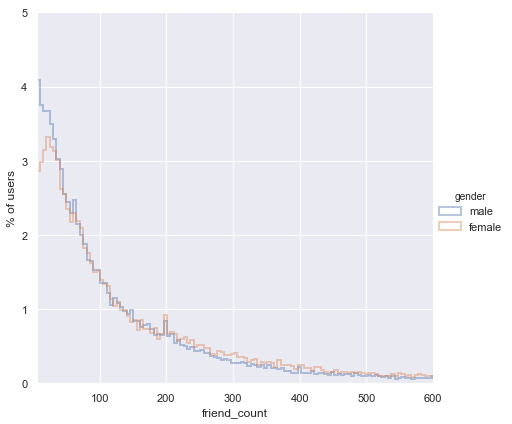

In [17]:
def plotdistiny(x,color=None,label=None,bins=np.linspace(0,1000,200),**kws):
    W=100*np.ones_like(x)/x.size
    plt.hist(x,bins=bins,alpha=0.4,histtype='step',linewidth=2,label=label,color=color,weights=W,**kws)
    return
g=sns.FacetGrid(df,col=None,hue='gender',size=6.0,xlim=(6,600),ylim=(0,5),legend_out=True)
g=(g.map(plotdistiny,'friend_count')).add_legend()
g=g.set_axis_labels('friend_count','% of users')

In [42]:
#find the friend count genderwise
fb.groupby("gender").friend_count.sum()

gender
female    9740258
male      9666787
Name: friend_count, dtype: int64

In [ ]:
#Female has more friends

5. what is the distributing of www likes

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


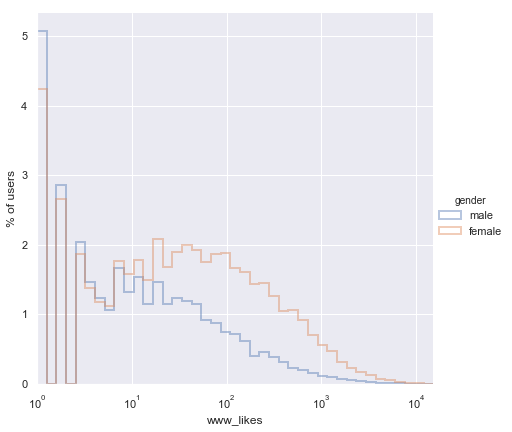

In [19]:
g=sns.FacetGrid(df,col=None,hue='gender',size=6.0,xlim=(1,15000))
g=(g.map(plotdistiny,'www_likes', bins=np.logspace(0,5,50))).add_legend()
g=g.set_axis_labels('www_likes','% of users')
plt.xscale('log')

In [20]:
fb.groupby("gender").www_likes.sum()

gender
female    3507665
male      1430175
Name: www_likes, dtype: int64

In [ ]:
#Female gets more www likes compared to Male

6. Which gender initiated more friend request ??

(0, 1000)

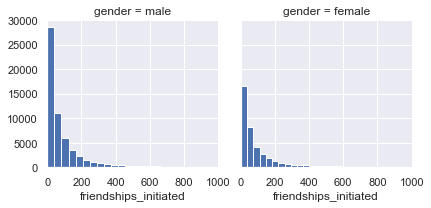

In [21]:
df=fb[fb.gender.notnull()]
g=sns.FacetGrid(df,col='gender')
g=g.map(plt.hist,"friendships_initiated",color='b',bins=100)
plt.xlim(0,1000)

In [ ]:
fb.groupby("gender").friendships_initiated.sum()

In [ ]:
#Gender Male intiates the friendship more compared to Female

7. Which % of facebook user using fb on mobile devices??

In [22]:
fb['mobile_check_in']=pd.Series(np.where(fb['mobile_likes']>0,1,0)).astype("category")
fb.mobile_check_in.value_counts()


1    63947
0    35056
Name: mobile_check_in, dtype: int64

In [ ]:
#63947 likes through mobille comparedto desktop

In [23]:
#we can find the % number people done the mobile checkin
check_ins=(fb.mobile_check_in==1).sum()/fb.mobile_check_in.size
print("number of mobile check_in",check_ins)


number of mobile check_in 0.6459097199074776


In [ ]:
#65% did mobile checkins